In [1]:
# creating sequences
import numpy as np

def create_sequences(df, seq_length):
    xs, ys = [], []

    for i in range(len(df) - seq_length):
        x = df.iloc[i:(i+seq_length), 1]
        y = df.iloc[i+seq_length, 1]

        xs.append(x)
        ys.append(y)

    return np.array(xs), np.array(ys)


In [2]:
import pandas as pd
train_data = pd.read_csv('./electricity_consump/electricity_train.csv')
train_data

,timestamp,consumption
0,2011-01-01 00:15:00,-0.704319
1,2011-01-01 00:30:00,-0.704319
2,2011-01-01 00:45:00,-0.678983
3,2011-01-01 01:00:00,-0.653647
4,2011-01-01 01:15:00,-0.704319
...,...,...
105210,2013-12-31 22:45:00,-0.932595
105211,2013-12-31 23:00:00,-0.907259
105212,2013-12-31 23:15:00,-0.932595
105213,2013-12-31 23:30:00,-0.932595


In [3]:
X_train,y_train = create_sequences(train_data,96)
print(X_train.shape,y_train.shape)

(105119, 96) (105119,)


In [4]:
import torch
from torch.utils.data import TensorDataset
dataset_train = TensorDataset(
    torch.from_numpy(X_train).float(),
    torch.from_numpy(y_train).float()
)

rnn have connections pointing back which is a hidden state h

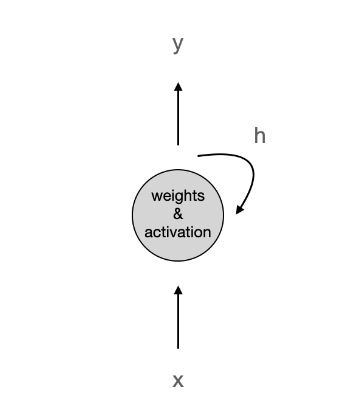


unrolling recurrent neuron though time

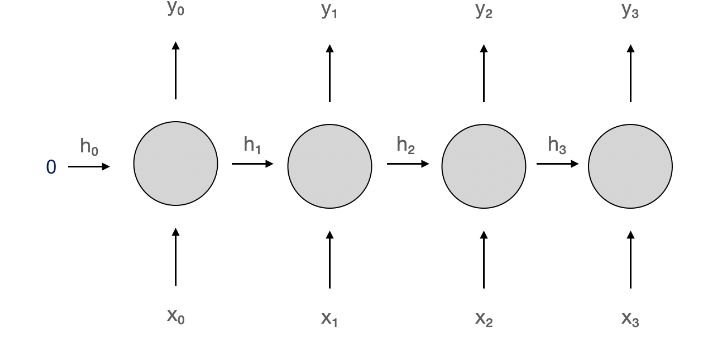

Deep rnns

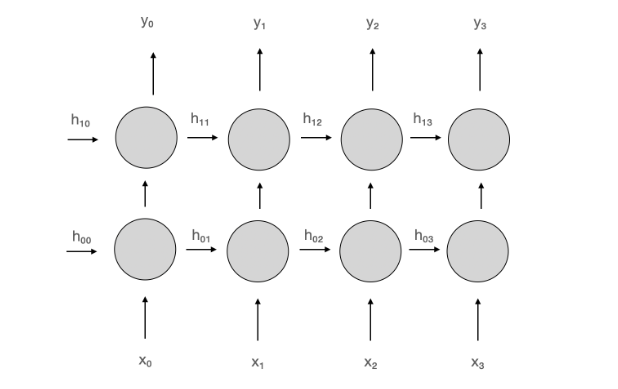

we distinguich 4 types of architectures depending on the input and output length

- sequence to seqeunce arch

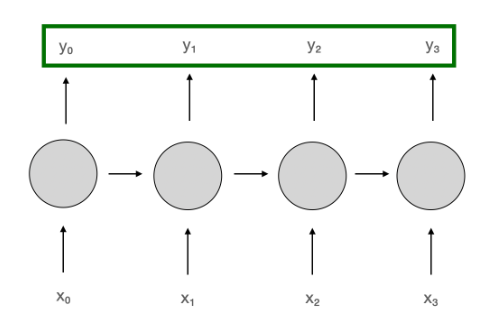

- sequence to vector : let process the whole text (example) then say which topic 
  
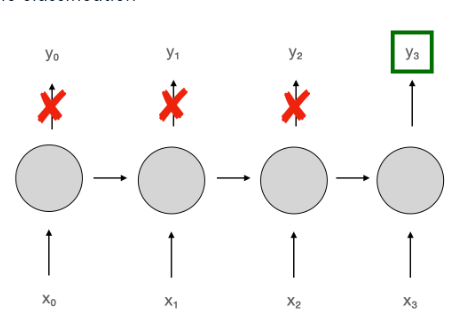

- vector to sequence : pass sigle input and make use of entire output sequence

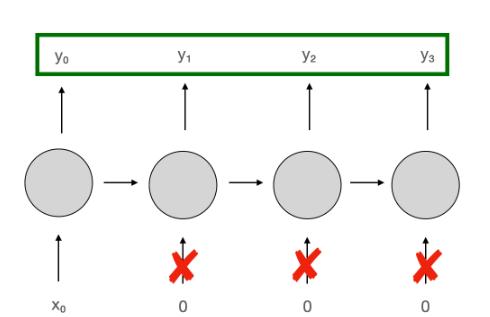

- encoder decoder : pass entire sequence ,only then start using output sequence (diffrent from seq2seq where output generated while input still received)

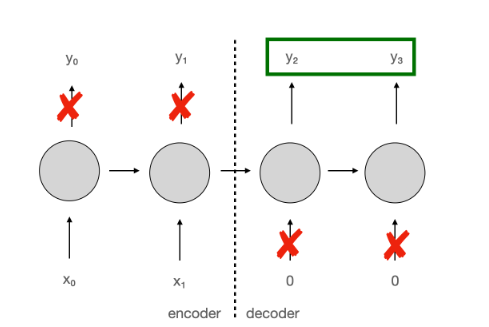

#Examples

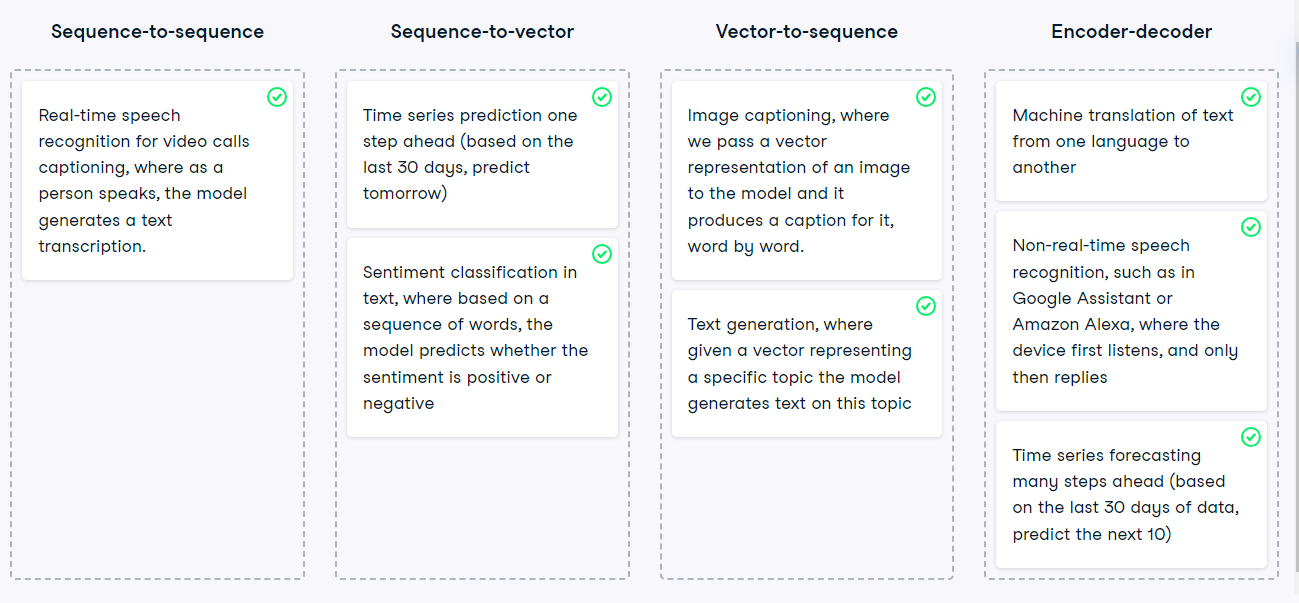

In [ ]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.rnn = nn.RNN(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out


but rnns have short term memory this why we use lstm and gru 

here is a LSTM cell 

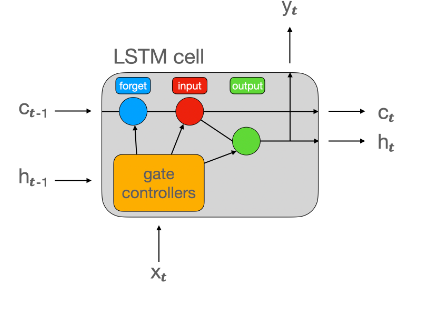

h short term 
c long term

forget gate : what to remove from long term memo

output gate : what to return at the current time step

just replace nn.RNN with nn.LSTM

In [ ]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.lstm = nn.LSTM(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        c0 = torch.zeros(2, x.size(0), 32)
        out, _ = self.lstm(x, (h0,c0))
        out = self.fc(out[:, -1, :])
        return out


gru cell : simplified version of lstm cell

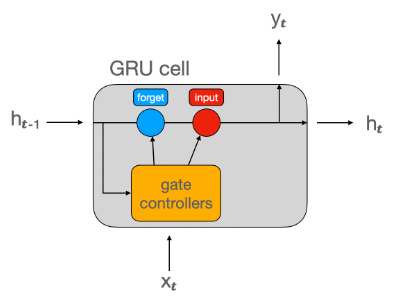

In [ ]:
import torch
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.gru = nn.GRU(
            input_size=1,
            hidden_size=32,
            num_layers=2,
            batch_first=True,
        )
        
        self.fc = nn.Linear(32, 1)

    def forward(self, x):
        h0 = torch.zeros(2, x.size(0), 32)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out


# what to use ?

plain rnns are not much used these days choice between gru and lstm

gru less complex => less computation time

but performance depends so try both and compare